# C0911596 Shubham Agrawal

# Assignment 1 Data Visualization 

In [1]:
#liabraries
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Multiple CSV files to DataFrames
df1 = pd.read_csv('Purchasing Card Data 2014 v1.csv')
df2 = pd.read_csv('PCard 1617.csv')
df3 = pd.read_csv('1718Pcard.csv')

#text document to a DataFrame
df_text = pd.read_csv('PCard Transactions 15-16.txt', delimiter=',')

In [3]:
#null values in df1
print(df1.isnull().sum())
df1.shape

Service Area           0
Account Description    0
Creditor               0
Transaction Date       0
JV Reference           0
JV Date                0
JV Value               0
dtype: int64


(4142, 7)

In [4]:
#disregard JV Date and making same column names of all Dfs
df1 = df1.drop(columns=['JV Date'])
df2.columns = df1.columns
df_text.columns = df1.columns

In [5]:
#null values in df2
print(df2.isnull().sum())
df2.shape

Service Area           0
Account Description    1
Creditor               1
Transaction Date       1
JV Reference           1
JV Value               0
dtype: int64


(4582, 6)

In [6]:
#null values in df3
print(df3.isnull().sum())
df3.shape

FIN.TRANSACTION DATE                     0
FIN.POSTING DATE                         0
FIN.TRANSACTION AMOUNT                   0
MCH.MERCHANT NAME                        0
MCH.CITY NAME                            4
FIN.ORIGINAL CURRENCY AMOUNT             0
FIN.ORIGINAL ISO CURRENCY CODE SYMBOL    0
FIN.INET CONVERSION                      0
dtype: int64


(4931, 8)

In [7]:
#null values in df_text
print(df_text.isnull().sum())
df_text.shape

Service Area           1
Account Description    1
Creditor               1
Transaction Date       1
JV Reference           1
JV Value               0
dtype: int64


(3865, 6)

In [8]:
#Merging all dfs
list_df = [df1, df2, df_text]
dfs = pd.concat([df1, df2, df_text], axis=0, ignore_index=True)

In [9]:
dfs.shape

(12589, 6)

# Task 1

In [10]:
dfs.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'JV Reference', 'JV Value'],
      dtype='object')

In [11]:
dfs['Transaction Date'] = pd.to_datetime(dfs['Transaction Date'], errors='coerce')
dfs['JV Value'] = pd.to_numeric(dfs['JV Value'], errors='coerce')
dfs['Quarter'] = dfs['Transaction Date'].dt.to_period('Q')

C:\Users\rahul\AppData\Local\Temp\ipykernel_35372\988659626.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfs['Transaction Date'] = pd.to_datetime(dfs['Transaction Date'], errors='coerce')


In [12]:
grouped_df = dfs.groupby(['Service Area', 'Quarter'])['JV Value'].agg(['count', 'mean']).reset_index()
print(grouped_df.shape)
# Prepare for visual representation by pivoting the table for easier plotting
pivot_table = grouped_df.pivot_table(values='count', index='Quarter', columns='Service Area', fill_value=0)

pivot_table.head()  # Display the first few rows of the pivot table to check the structure

(129, 4)


Service Area,Adults and Communities,Assurance,CSG Managed Budget,Children's Education & Skills,Children's Family Services,Children's Service DSG,Childrens Services,Commercial,Commissioning,Control Accounts,...,Governance,HRA,Internal Audit & CAFT,NSCSO,Parking & Infrastructure,Public Health,Regional Enterprise,Strategic Commissioning Board,Street Scene,Streetscene
Quarter,,,,,,,,,,,,,,,,,,,,,
2014Q2,16,0,13,0,0,0,943,0,0,8,...,2,0,2,1,0,2,0,1,11,0
2014Q3,8,0,8,0,0,31,330,8,0,0,...,3,0,7,2,0,0,0,0,16,0
2014Q4,18,3,4,72,597,32,20,0,44,0,...,1,0,2,0,2,0,0,0,12,25
2015Q1,11,4,0,165,607,15,0,0,29,0,...,0,0,0,0,1,0,1,0,0,37
2015Q2,8,51,0,160,587,12,0,0,10,0,...,0,0,0,0,0,0,0,0,0,23


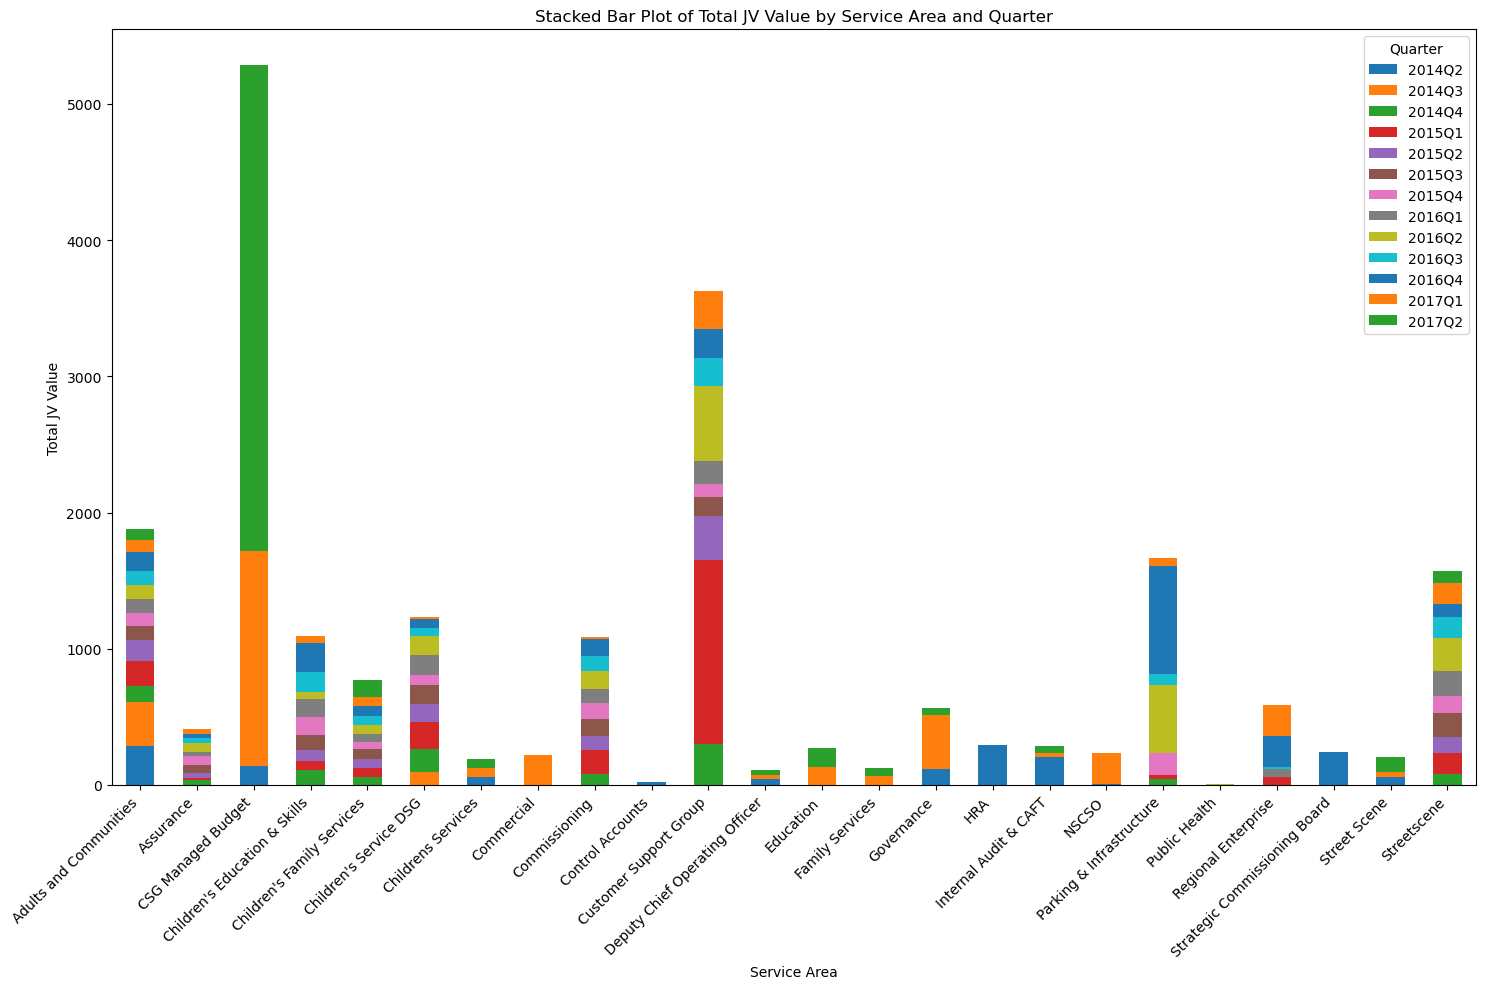

In [13]:
# Pivot the DataFrame to have quarters as columns and service areas as index
pivot_df = dfs.pivot_table(index='Service Area', columns='Quarter', values='JV Value', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Stacked Bar Plot of Total JV Value by Service Area and Quarter')
plt.xlabel('Service Area')
plt.ylabel('Total JV Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

# Task 2

In [14]:
# Aggregate spending by Service Area, Account, and Quarter
# Calculate total spending in these groups

# Group by Service Area, Account Description, and Quarter
spending_grouped_df = dfs.groupby(['Service Area', 'Account Description', 'Quarter'])['JV Value'].sum().reset_index()

# For the initial analysis, let's focus on total spending trends for the top Service Areas and Accounts by total spending
# Identify top Service Areas and Accounts by total spending
top_service_areas_spending = spending_grouped_df.groupby('Service Area')['JV Value'].sum().sort_values(ascending=False).head(5).index
top_accounts_spending = spending_grouped_df.groupby('Account Description')['JV Value'].sum().sort_values(ascending=False).head(5).index

# Filter data for top Service Areas and Accounts
filtered_spending = spending_grouped_df[(spending_grouped_df['Service Area'].isin(top_service_areas_spending)) & 
                                        (spending_grouped_df['Account Description'].isin(top_accounts_spending))]

# Now let's pivot this data for plotting
pivot_spending = filtered_spending.pivot_table(values='JV Value', index=['Quarter', 'Service Area'], columns='Account Description', fill_value=0).reset_index()

pivot_spending  # Display the first few rows to check the structure


Account Description,Quarter,Service Area,Equipment and Materials Purcha,Food Costs,Legal and Court Fees,Other Services,Other Transfer Payments to Soc
0,2014Q2,Childrens Services,12611.78,13805.57,625.23,1784.34,1390.00
1,2014Q3,Childrens Services,4283.40,5515.74,70.99,3386.17,422.99
2,2014Q3,Family Services,6677.76,8080.82,518.25,1889.60,3219.81
3,2014Q4,Children's Education & Skills,2742.30,2095.66,0.00,0.00,0.00
4,2014Q4,Children's Family Services,8169.14,9025.37,1304.14,859.92,3261.14
5,2014Q4,Childrens Services,347.01,632.33,0.00,0.00,0.00
6,2014Q4,Family Services,4152.88,3477.33,-9.25,633.34,3822.61
7,2014Q4,Streetscene,130.29,0.00,0.00,0.00,0.00
8,2015Q1,Children's Education & Skills,2159.21,2438.23,0.00,0.00,0.00
9,2015Q1,Children's Family Services,10713.39,9142.77,90.38,3495.81,2420.71


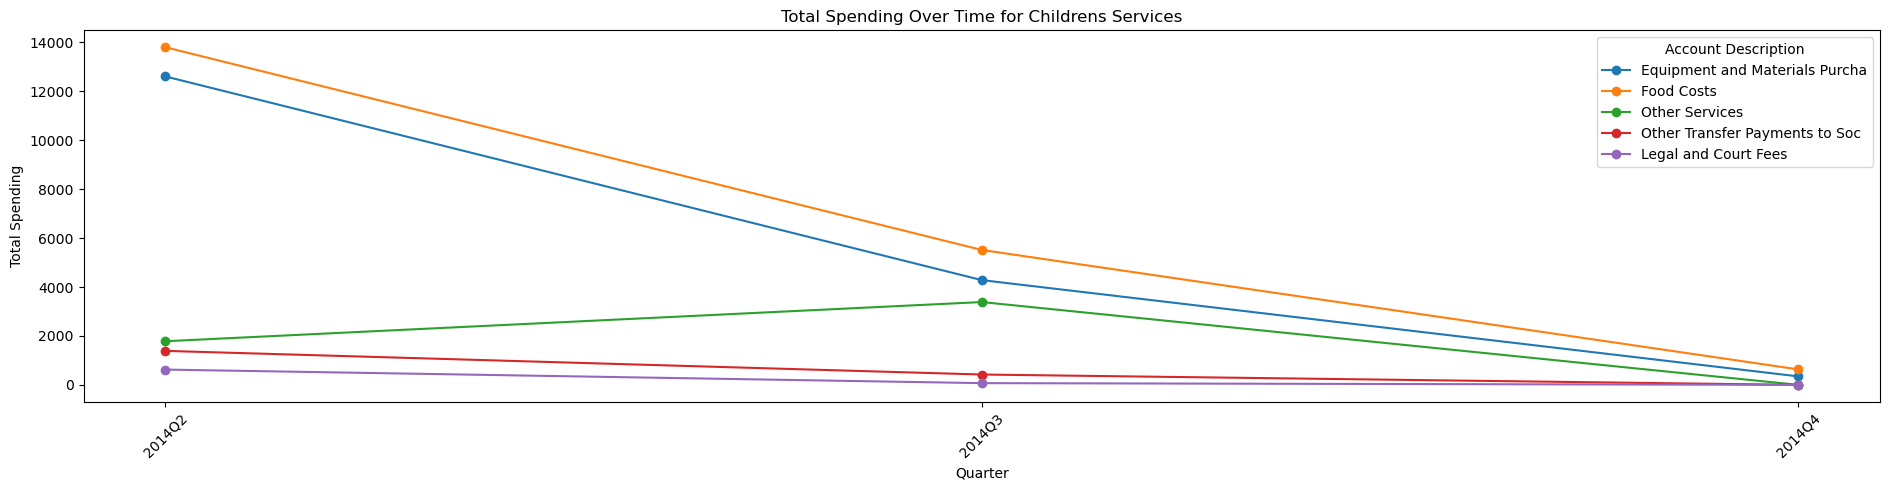

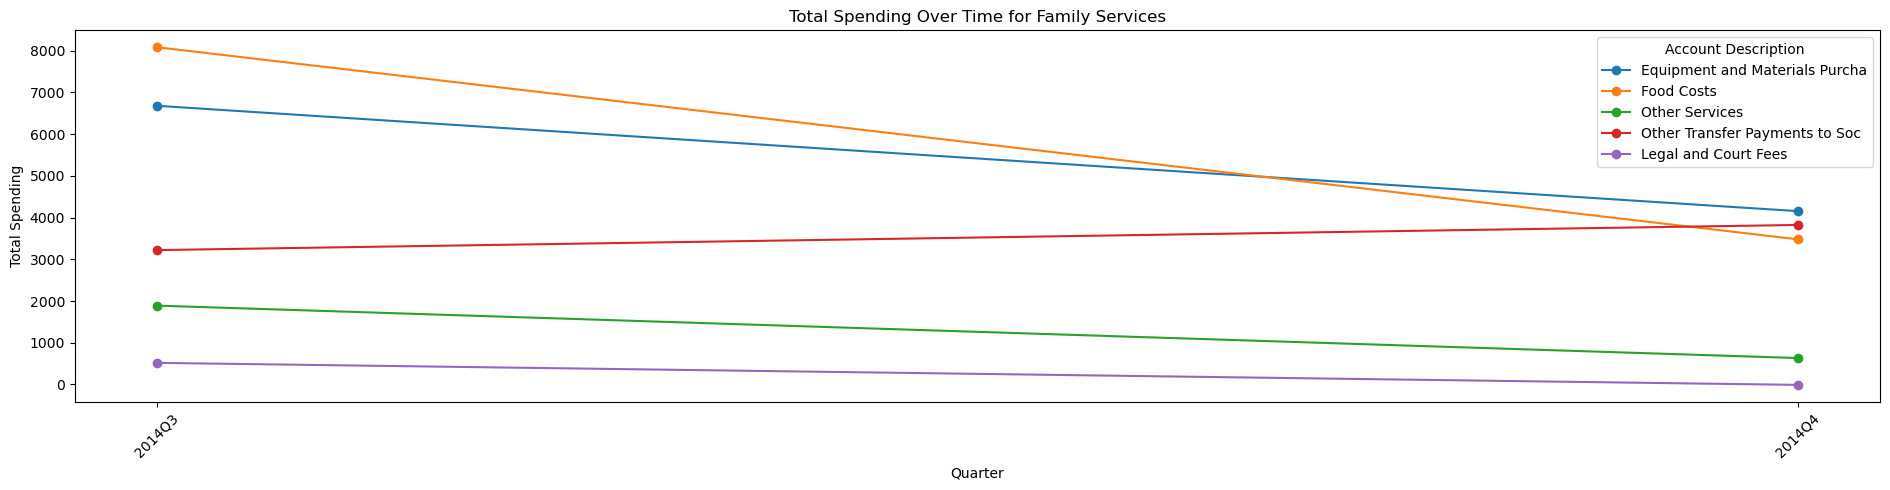

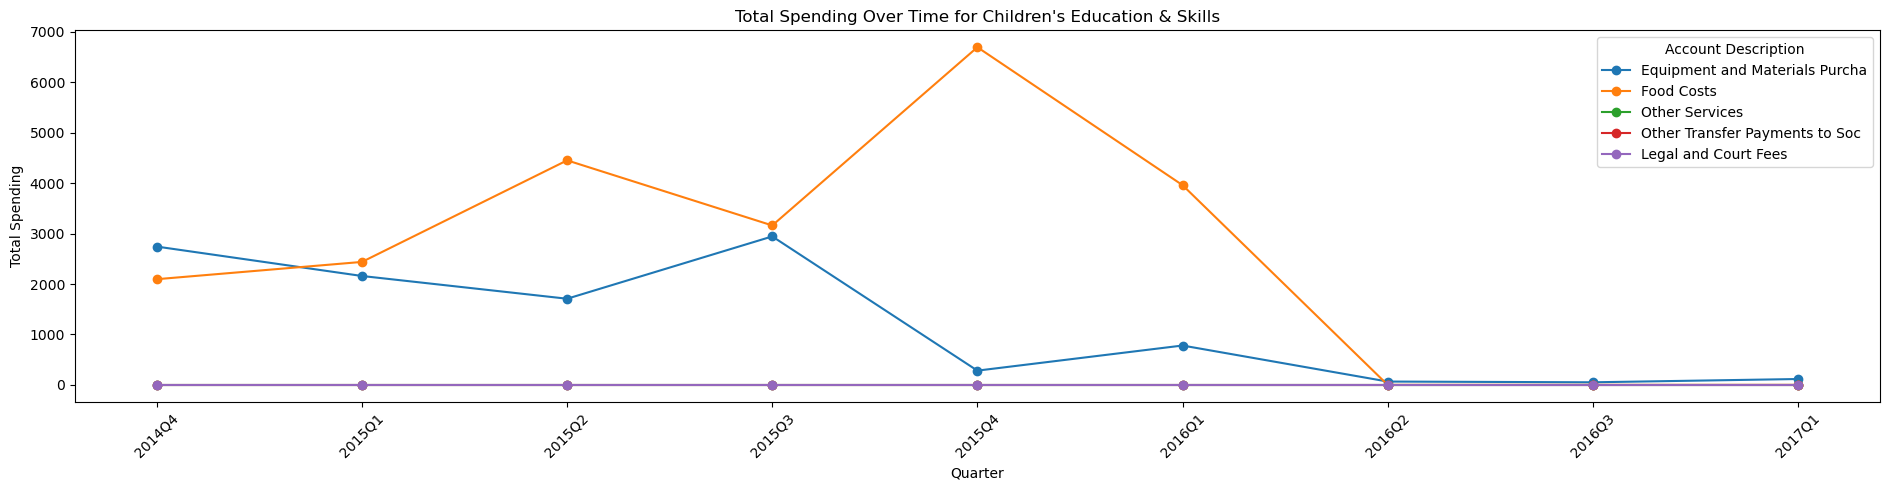

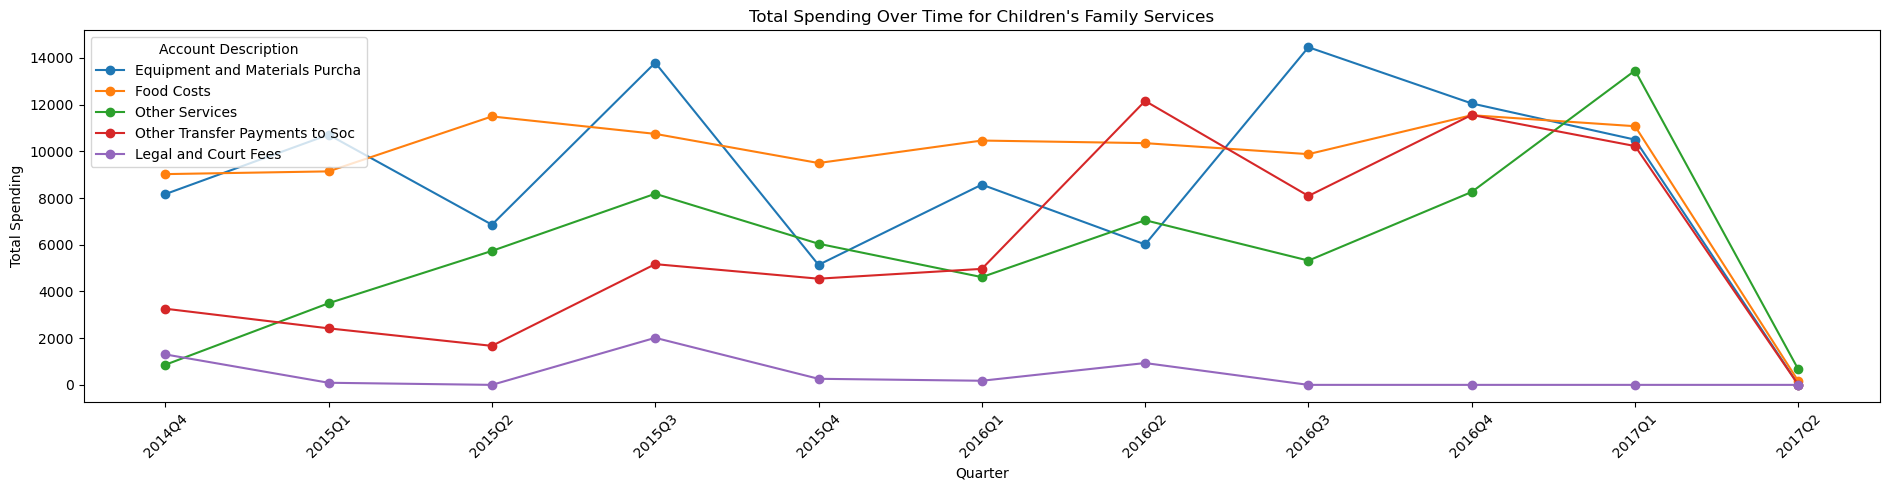

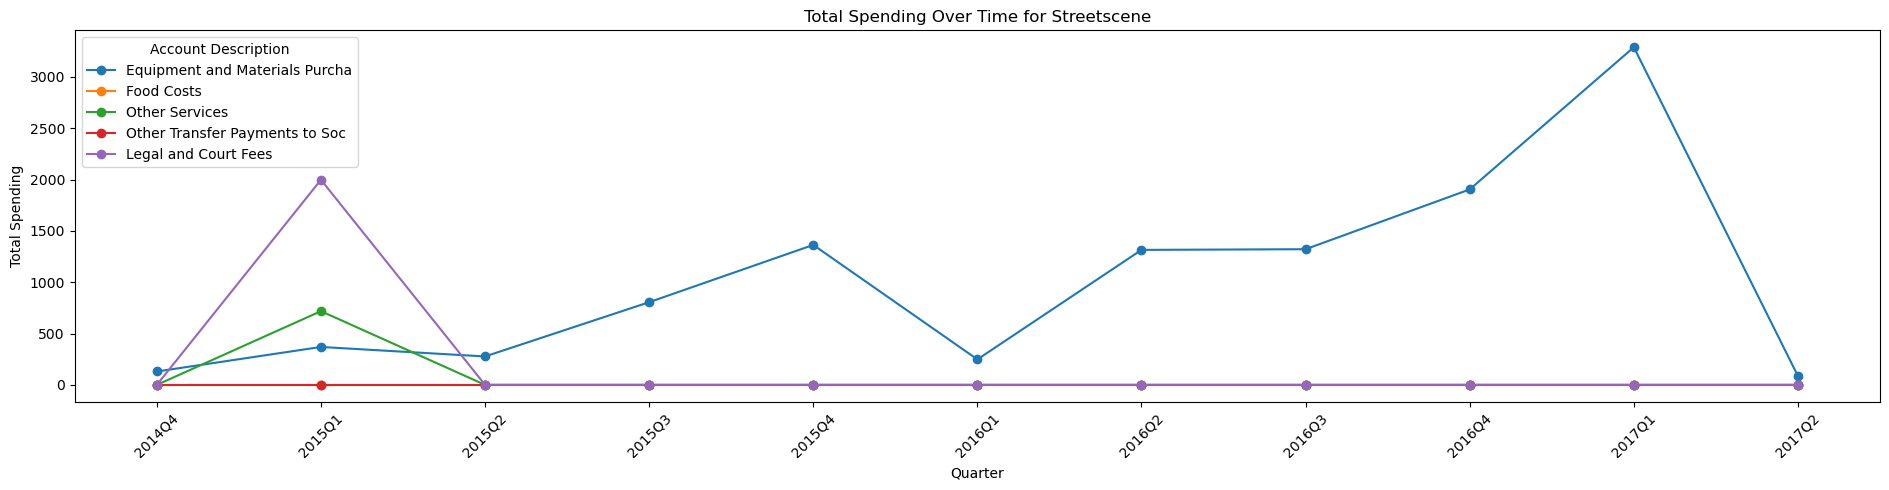

In [15]:
# Iterate over each service area
for service_area in pivot_spending['Service Area'].unique():
    # Filter data for the current service area
    service_area_data = pivot_spending[pivot_spending['Service Area'] == service_area]

    # Plotting
    plt.figure(figsize=(19, 5))
    for account in top_accounts_spending:
        if account in service_area_data.columns:
            plt.plot(service_area_data['Quarter'].astype(str), service_area_data[account], marker='o', label=account)

    plt.title(f'Total Spending Over Time for {service_area}')
    plt.xlabel('Quarter')
    plt.ylabel('Total Spending')
    plt.xticks(rotation=45)
    plt.legend(title='Account Description')
    plt.tight_layout()
    plt.show()


# Task 3

In [16]:
# Step 1: Creditor to Account Mapping
# Group the data by Creditor and Account Description to see the distribution

creditor_account_mapping =dfs.groupby(['Creditor', 'Account Description']).size().unstack(fill_value=0)

# Step 2: Consistency Check
# For each Creditor, we will identify if there's a significant inconsistency in how they are classified into Accounts

# Calculate the percentage of total transactions per Creditor for each Account
creditor_account_percentage = creditor_account_mapping.div(creditor_account_mapping.sum(axis=1), axis=0) * 100

# Filter to find Creditors where a single account does not dominate the classification
# We will consider it significant if no single account comprises more than 80% of a creditor's transactions, as an example threshold
potential_misclassifications = creditor_account_percentage[creditor_account_percentage.max(axis=1) < 80]


In [17]:
potential_misclassifications.to_csv('output1.csv',index=False)

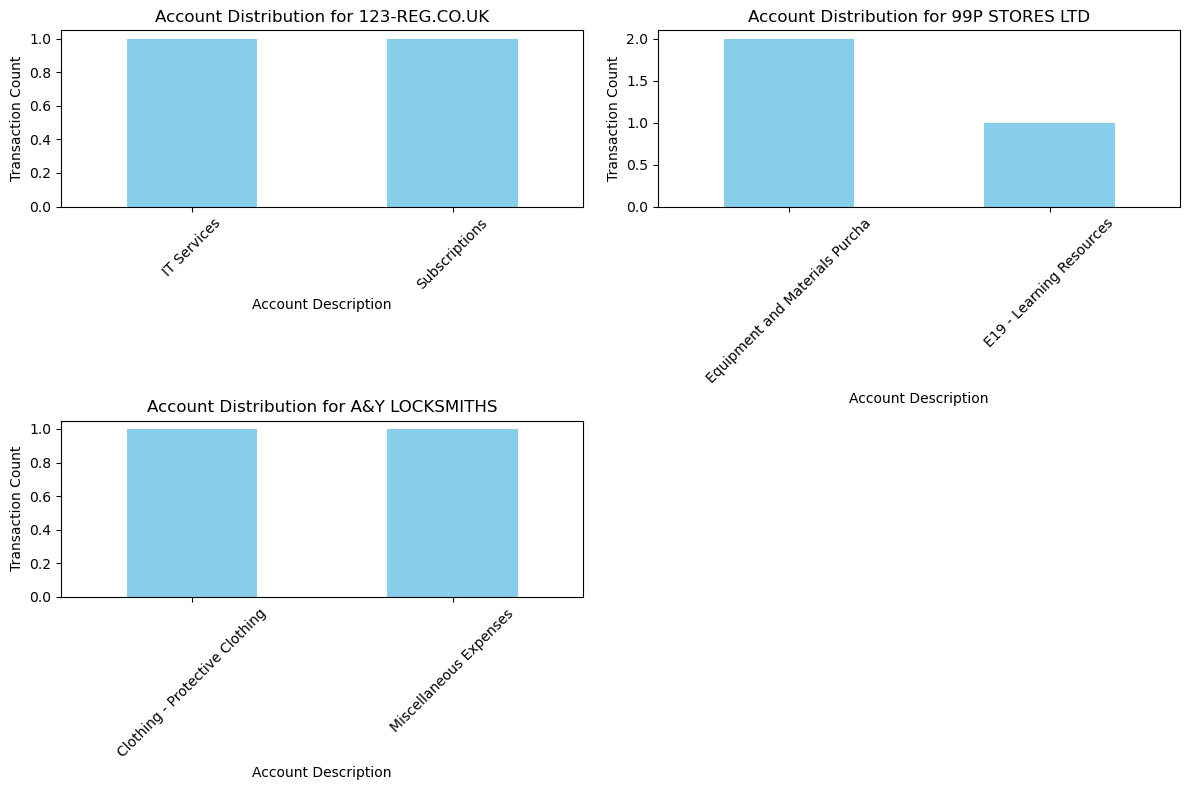

In [18]:
# For visualization, let's illustrate the distribution of Account Descriptions for a select few Creditors
# that have been identified with potential misclassifications (i.e., those classified into multiple accounts).

# Select Creditors with the most diverse classification into accounts for visualization
# Using 'potential_misclassifications' identified earlier, select the top 3 for visualization based on diversity of account classification
top_creditors_for_visualization = potential_misclassifications.index[:3]

# Prepare data for visualization: Filter original combined_df for these top creditors
visualization_data = dfs[dfs['Creditor'].isin(top_creditors_for_visualization)]

# Plotting
plt.figure(figsize=(12, 8))

for i, creditor in enumerate(top_creditors_for_visualization, start=1):
    plt.subplot(2, 2, i)
    creditor_data = visualization_data[visualization_data['Creditor'] == creditor]['Account Description'].value_counts()
    creditor_data.plot(kind='bar', color='skyblue')
    plt.title(f'Account Distribution for {creditor}')
    plt.xlabel('Account Description')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Task 4

In [19]:
# Feature Engineering: Calculate the number of transactions and average transaction size for each Service Area
features_df = dfs.groupby('Service Area')['JV Value'].agg(['count', 'mean']).reset_index()
features_df.columns = ['Service Area', 'Transaction Count', 'Average Transaction Size']

In [20]:
# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df[['Transaction Count', 'Average Transaction Size']])

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [23]:
# Check for NaN values in the features
nan_check = features_df[['Transaction Count', 'Average Transaction Size']].isna().sum()

# Fill NaN values with 0 for simplicity, acknowledging that this may not be the best approach in all contexts
features_df = features_df.fillna(0)

# Re-normalize the features after handling NaN values
features_scaled = scaler.fit_transform(features_df[['Transaction Count', 'Average Transaction Size']])

# Re-apply clustering with KMeans
features_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Re-check the distribution of Service Areas in clusters after handling NaN values
cluster_distribution = features_df.groupby('Cluster').size()

nan_check, cluster_distribution


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(Transaction Count           0
 Average Transaction Size    0
 dtype: int64,
 Cluster
 0     7
 1     1
 2     1
 3     5
 4    11
 dtype: int64)

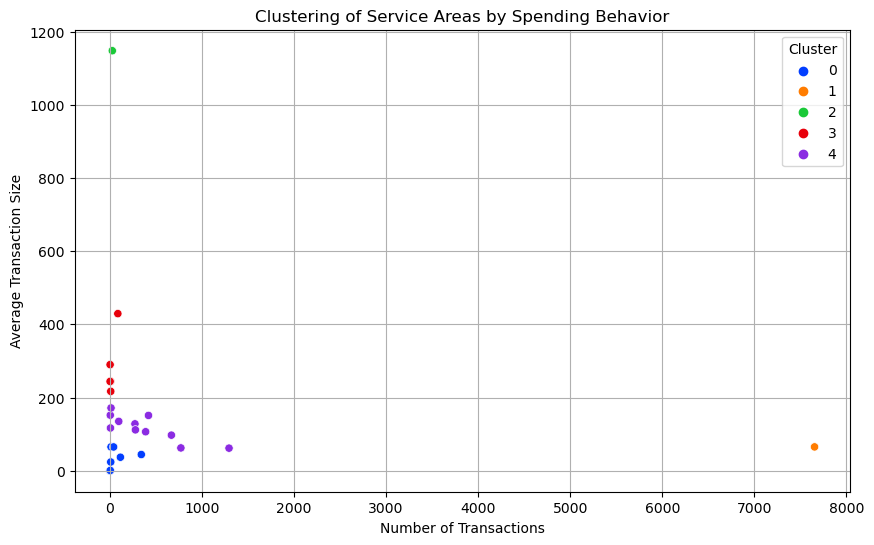

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x='Transaction Count', y='Average Transaction Size', hue='Cluster', palette='bright', legend='full')
plt.title('Clustering of Service Areas by Spending Behavior')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Transaction Size')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Task 5

In [25]:
from sklearn.ensemble import IsolationForest

# Since we're focusing on 'JV Value' for anomaly detection, let's prepare our data
dfs['Isolation Score'] = 0  # Initialize column for anomaly scores

# Applying Isolation Forest for each Service Area separately to ensure a diverse sample
for service_area in dfs['Service Area'].unique():
    # Filter dataset for the current Service Area
    area_data = dfs[dfs['Service Area'] == service_area]
    
    # Check if there are enough transactions to analyze
    if area_data.shape[0] > 10:  # Using 10 as a threshold to apply Isolation Forest
        # Select 'JV Value' for anomaly detection
        jv_values = area_data[['JV Value']].copy()
        
        # Handling NaN values by replacing them with the median, to avoid distorting the analysis
        jv_values.fillna(jv_values.median(), inplace=True)
        
        # Isolation Forest model
        iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
        iso_forest.fit(jv_values)
        
        # Predict anomalies
        scores = iso_forest.decision_function(jv_values)
        dfs.loc[area_data.index, 'Isolation Score'] = scores

# Selecting transactions with the lowest anomaly scores as potential outliers
# Sorting by 'Isolation Score' to get the most anomalous transactions
anomalous_transactions = dfs.sort_values(by=['Service Area', 'Isolation Score']).groupby('Service Area').head(5)

# Ensuring a diverse sample across Service Areas
anomalous_sample = anomalous_transactions.sample(min(len(anomalous_transactions), 200))

anomalous_sample[['Service Area', 'Creditor', 'Transaction Date', 'JV Value', 'Isolation Score']].head()  # Preview of the sample


,Service Area,Creditor,Transaction Date,JV Value,Isolation Score
8515,Regional Enterprise,COMPANIES HOUSE,2016-08-11,12.00,0.000000
8514,Regional Enterprise,HMCOURTS-SERVICE.G,2016-12-20,226.00,0.000000
3117,Children's Education & Skills,PAYPAL REMMERCOLTD,2014-12-02,-180.79,-0.268594
8509,Parking & Infrastructure,NOCHEX. BPH POSTCODES,2016-06-15,500.00,-0.170971
1489,Commercial,BRITISH GAS TRADIN,2014-08-18,262.75,0.000000


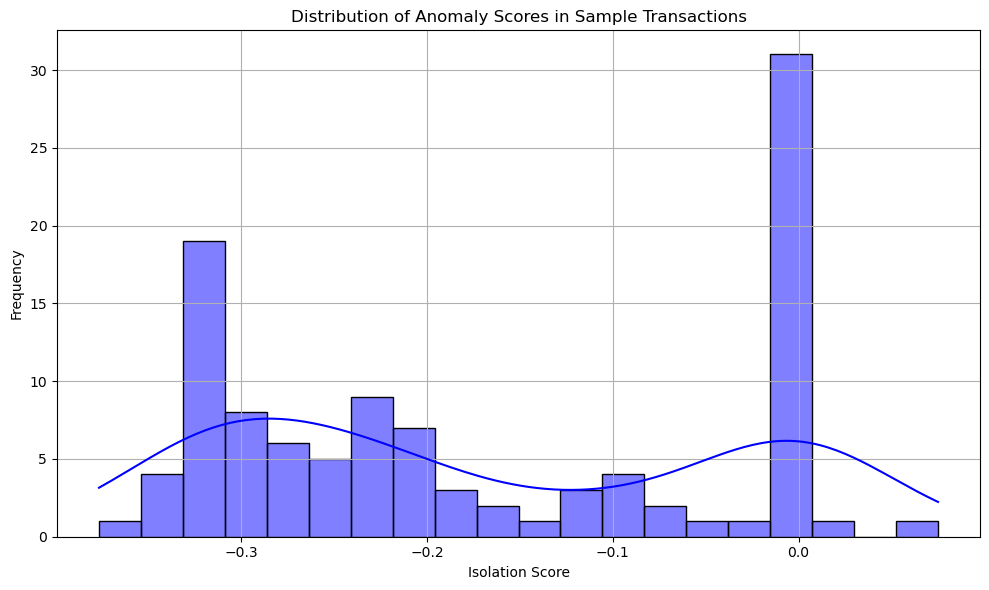

In [26]:
# Generate a visualization for the sample: distribution of anomaly scores in the sample
plt.figure(figsize=(10, 6))
sns.histplot(anomalous_sample['Isolation Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores in Sample Transactions')
plt.xlabel('Isolation Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Note: The actual PDF generation and saving of the full analysis, including code, explanations, and visualizations,
# cannot be directly executed within this notebook environment. However, the user can export the notebook content
# and use external tools (e.g., Jupyter Notebook's "Download as PDF" feature or LaTeX) to create a PDF document.
